In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import netket as nk

import dynamics as nkt

In [3]:
F1 = nkt.schedules.Quadratic(0.5, 8, 0)
F2 = nkt.schedules.Linear(0.5, 0, 9)

F = F1.append(F2)

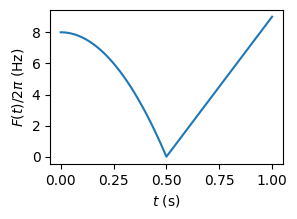

In [4]:
ax = F.plot()
plt.show()

In [4]:
import netket as nk

x = nk.operator.spin.sigmax(nk.hilbert.Spin(1 / 2), 0)
y = nk.operator.spin.sigmay(nk.hilbert.Spin(1 / 2), 0)

In [5]:
F1 * (F2+1)

Quadratic*Linear(T=0.5, in 2π[8.00,0.00])

In [6]:
H = nkt.operators.hamiltonian.TimeDependentHamiltonian((x, y), (F1/2.0, F2))

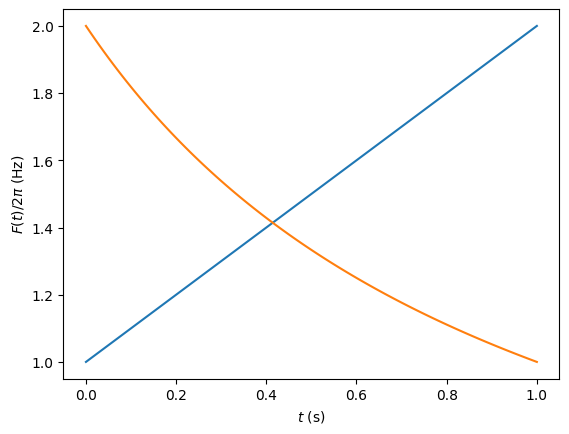

In [11]:
F1 = nkt.schedules.Linear(1.0, 1, 2)
F2 = nkt.schedules.Constant(1.0, 2)


fig, ax = plt.subplots(1,1)
F1.plot(ax)

F = (F2/F1 )
F.plot(ax)

plt.show()

# Exact evolution driver

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import netket as nk
import netket.experimental as nkx

import dynamics as nkt
from netket.operator.spin import sigmax,sigmaz

In [6]:
T = 15.0
N = 4
hi = nk.hilbert.Spin(1/2,N)
H = nkt.operators.hamiltonian.TimeDependentHamiltonian(
    [-nkt.operators.Hx(hi,N), nkt.operators.Hzz(hi, [(i,(i+1)%N) for i in range(N)])],
    [1-nkt.schedules.Linear(10,0,1).append(nkt.schedules.Constant(5.0, 1.0)), nkt.schedules.Linear(10,0,1).append(nkt.schedules.Constant(5.0, 1.0))],
)
psi0 = np.ones(hi.n_states, dtype=complex)
psi0 = psi0/np.linalg.norm(psi0)



<Axes: xlabel='$t$ (s)', ylabel='$F(t)/2\\pi$ (Hz)'>

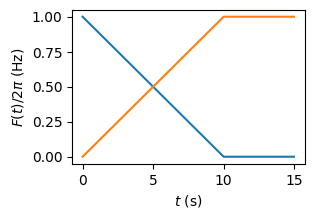

In [7]:
H.plot()

In [8]:
te = nkt.exact.ExactEvolution(
    H, psi0, ode_solver=nkx.dynamics.RK4(1e-2), t0=0.
)


In [9]:
te.run(
    T, out=nk.logging.JsonLog('test/exact'), obs={'m':sum([sigmaz(hi,i) for i in range(N)])/N, 'x':sum([sigmax(hi,i) for i in range(N)])/N}
)

  0%|          | 0.00/15.0 [00:00<?, ?it/s]

(JsonLog('test/exact', mode=write, autoflush_cost=0.005)
   Runtime cost:
   	Log:    0.0473325252532959
   	Params: 0.04278874397277832,)

In [10]:
import json
log = json.load(open('test/exact.log'))

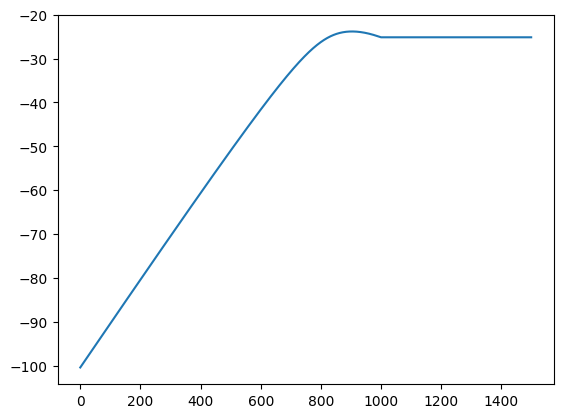

In [11]:
plt.plot(log['Generator']['Mean']['real'])

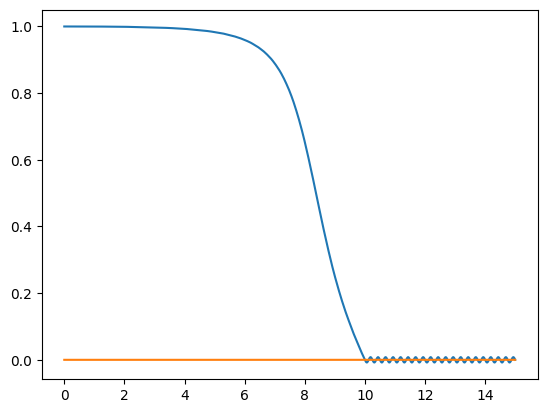

In [12]:
plt.plot(log['x']['iters'], log['x']['Mean']['real'])
plt.plot(log['m']['iters'], log['m']['Mean']['real'])